# Aula 1

## Importando e traduzindo os dados

In [145]:
import pandas as pd

In [146]:
pd.read_csv("tips_atualizado.csv")

,total_bill,tip,dessert,day,time,size
0,16.990000,1.010000,No,Sun,Dinner,2
1,10.340000,1.660000,No,Sun,Dinner,3
2,21.010000,3.500000,No,Sun,Dinner,3
3,23.680000,3.310000,No,Sun,Dinner,2
4,24.590000,3.610000,No,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2


In [147]:
dados = pd.read_csv("tips.csv")

In [148]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [149]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [150]:
renomear = {
    'total_bill': "total_conta", 
    'tip': 'gorjeta', 
    'dessert': 'sobremesa', 
    'day': "dia", 
    'time': "hora", 
    'size': "qtd_pessoas"
}

In [151]:
type(dados)

pandas.core.frame.DataFrame

In [152]:
gorjetas = dados.rename(columns = renomear)

In [153]:
gorjetas.head()

,total_conta,gorjeta,sobremesa,dia,hora,qtd_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [154]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [155]:
sim_nao = {
    'No': 'Não', 
    'Yes': 'Sim'
}

In [156]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [157]:
gorjetas.head()

,total_conta,gorjeta,sobremesa,dia,hora,qtd_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [158]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [159]:
gorjetas.head()

,total_conta,gorjeta,sobremesa,dia,hora,qtd_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [160]:
gorjetas.dia.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [161]:
dias = {
    'Sun': 'Domingo', 
    'Sat': 'Sábado', 
    'Thur': 'Quinta-Feira', 
    'Fri': 'Sexta-Feira'
}

In [162]:
gorjetas.dia = gorjetas.dia.map(dias)

In [163]:
gorjetas.head()

,total_conta,gorjeta,sobremesa,dia,hora,qtd_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [164]:
gorjetas.dia.unique()

array(['Domingo', 'Sábado', 'Quinta-Feira', 'Sexta-Feira'], dtype=object)

In [165]:
gorjetas.hora.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [166]:
refeicao = {
    'Dinner': 'Jantar', 
    'Lunch': 'Almoço'
}

In [167]:
gorjetas.hora = gorjetas.hora.map(refeicao)

In [168]:
gorjetas.hora.unique()

array(['Jantar', 'Almoço'], dtype=object)

In [169]:
gorjetas.head()

,total_conta,gorjeta,sobremesa,dia,hora,qtd_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Aula 2

## Comparando distribuições de maneira exploratória

In [170]:
import seaborn as sns

In [171]:
!pip show seaborn

Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\hugor\anaconda3\lib\site-packages
Requires: scipy, matplotlib, pandas, numpy
Required-by: 


### Análise 1 - valor da conta vs gorjeta

In [172]:
gorjetas.columns

Index(['total_conta', 'gorjeta', 'sobremesa', 'dia', 'hora', 'qtd_pessoas'], dtype='object')

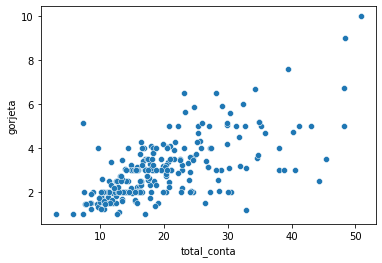

In [173]:
valor_gorjeta = sns.scatterplot(x="total_conta", y="gorjeta", data=gorjetas)

Visualmente o valor da gorjeta aumenta conforme aumenta o valor da conta

In [174]:
print(f"A base de dados contém {gorjetas.shape[0]} registros")

A base de dados contém 244 registros


In [175]:
print(f"Registros não nulos:\n{gorjetas.count()}")

Registros não nulos:
total_conta    244
gorjeta        244
sobremesa      244
dia            244
hora           244
qtd_pessoas    244
dtype: int64


### Criando o campo porcentagem

In [176]:
gorjetas.head()

,total_conta,gorjeta,sobremesa,dia,hora,qtd_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [177]:
gorjetas["porcentagem"] = gorjetas["gorjeta"] / gorjetas["total_conta"]

In [178]:
gorjetas.head()

,total_conta,gorjeta,sobremesa,dia,hora,qtd_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [179]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [180]:
gorjetas.head()

,total_conta,gorjeta,sobremesa,dia,hora,qtd_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


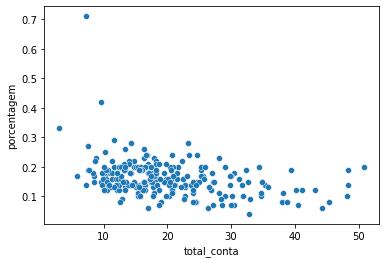

In [181]:
porcentagem_conta = sns.scatterplot(x="total_conta", y="porcentagem", data=gorjetas)

Visualmente o valor da conta não é proporcional ao valor da gorjeta

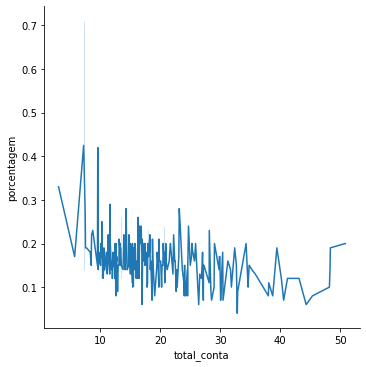

In [182]:
porcentagem_conta_linha = sns.relplot(x="total_conta", y="porcentagem", data=gorjetas, kind="line")

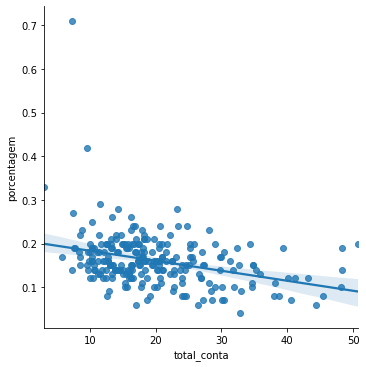

In [183]:
sns.lmplot(x="total_conta", y="porcentagem", data=gorjetas)

# Aula 3

## Analisando de forma visual e descritiva

In [184]:
gorjetas.head()

,total_conta,gorjeta,sobremesa,dia,hora,qtd_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


### Análise 2 - Sobremesa

In [185]:
gorjetas[gorjetas.sobremesa == "Sim"].describe()

,total_conta,gorjeta,qtd_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [186]:
gorjetas[gorjetas.sobremesa == "Não"].describe()

,total_conta,gorjeta,qtd_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


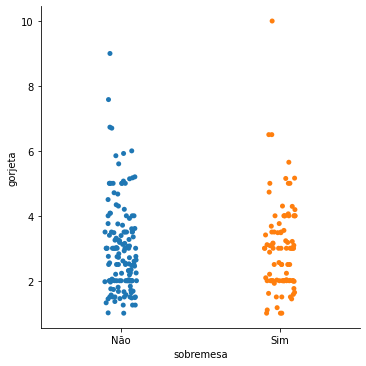

In [187]:
sns.catplot(x="sobremesa", y="gorjeta", data=gorjetas)

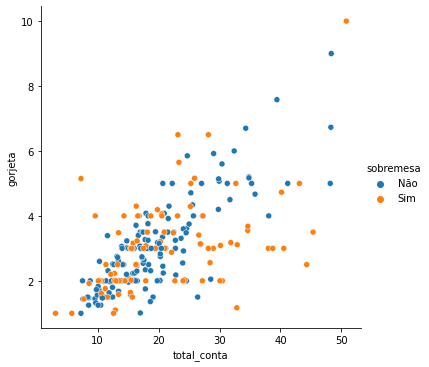

In [188]:
sns.relplot(x="total_conta", y="gorjeta", hue="sobremesa", data=gorjetas)

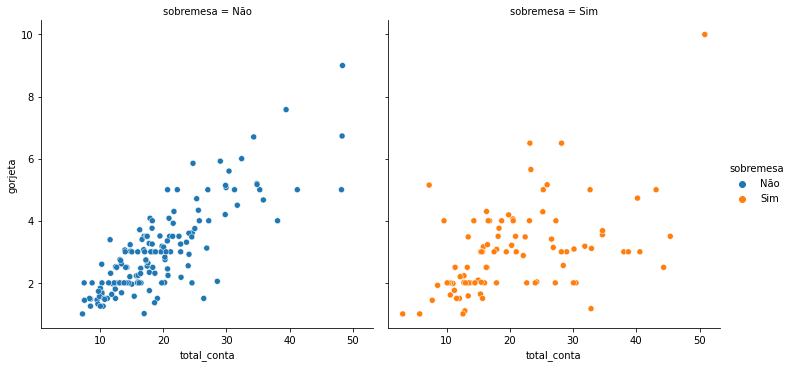

In [189]:
sns.relplot(x="total_conta", y="gorjeta", hue="sobremesa", col="sobremesa", data=gorjetas)

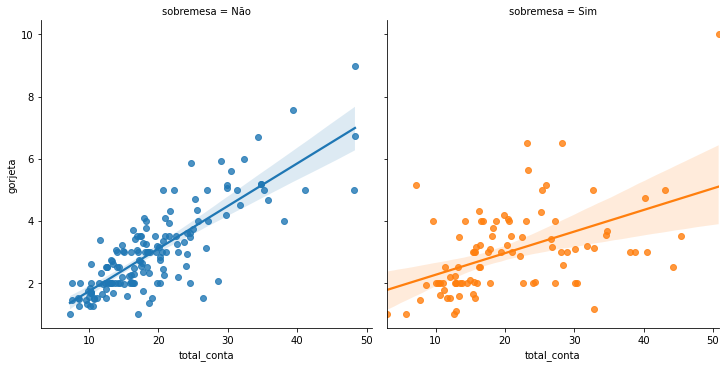

In [190]:
sns.lmplot(x="total_conta", y="gorjeta", col="sobremesa", hue="sobremesa", data=gorjetas)

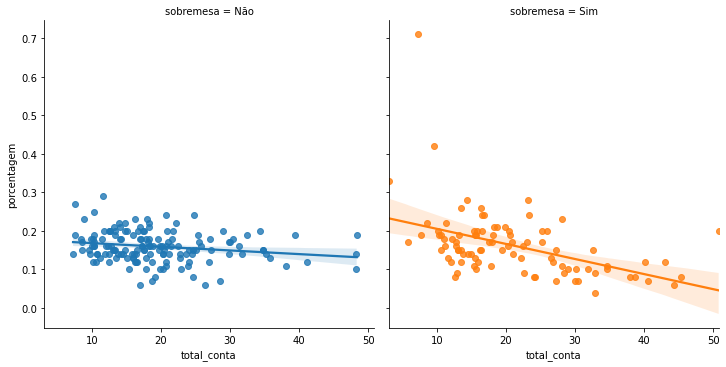

In [191]:
sns.lmplot(x="total_conta", y="porcentagem", col="sobremesa", hue="sobremesa", data=gorjetas)

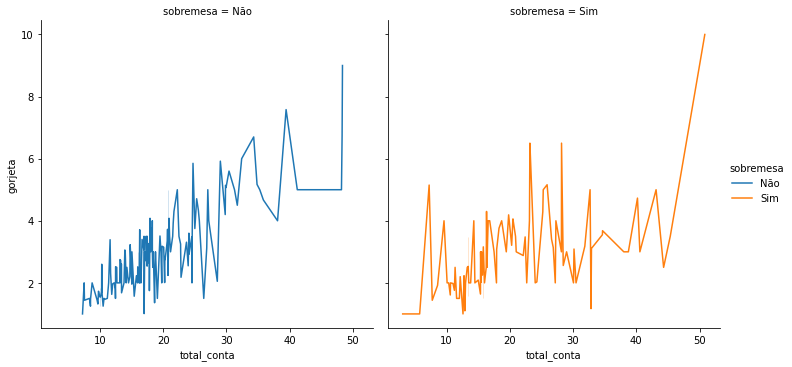

In [192]:
sns.relplot(x="total_conta", y="gorjeta", hue="sobremesa", col="sobremesa", kind="line", data=gorjetas)

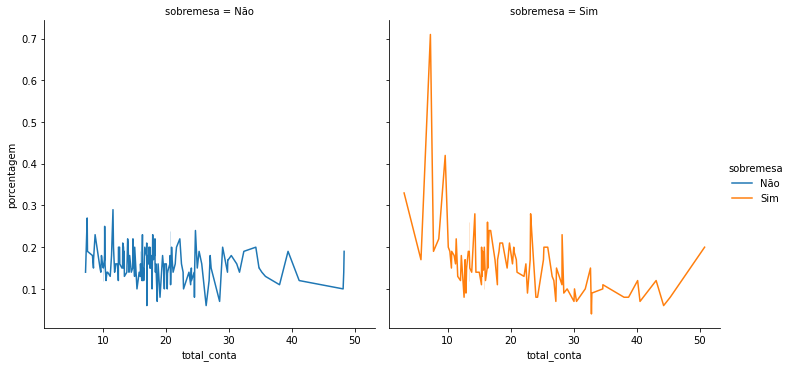

In [193]:
sns.relplot(x="total_conta", y="porcentagem", hue="sobremesa", col="sobremesa", kind="line", data=gorjetas)

Visualmente existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e aqueles que não pediram

### Teste de hipótese

H<sup>null</sup>

> A distribuição da taxa da gorjeta é a mesma nos dois grupos

H<sup>alt</sup>

> A distribuição da taxa da gorjeta não é a mesma nos dois grupos

In [194]:
from scipy.stats import ranksums

In [195]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [196]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [197]:
r = ranksums(sobremesa, sem_sobremesa)

In [198]:
print(f"O valor do p-value é {r.pvalue}")

O valor do p-value é 0.5266635660124415


H<sup>null</sup>

> A distribuição da taxa da gorjeta é a mesma nos dois grupos


# Aula 4

## Comparando e explorando os dias da semana

### Análise 3 - Dias da semana

In [199]:
gorjetas.head()

,total_conta,gorjeta,sobremesa,dia,hora,qtd_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [200]:
gorjetas.dia.unique()

array(['Domingo', 'Sábado', 'Quinta-Feira', 'Sexta-Feira'], dtype=object)

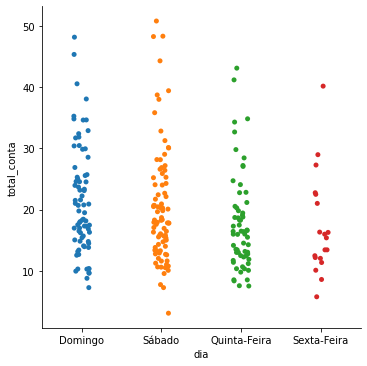

In [201]:
sns.catplot(x="dia", y="total_conta", data=gorjetas)

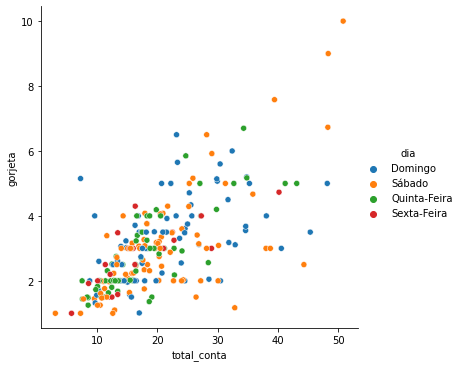

In [202]:
sns.relplot(x="total_conta", y="gorjeta", hue="dia", data=gorjetas)

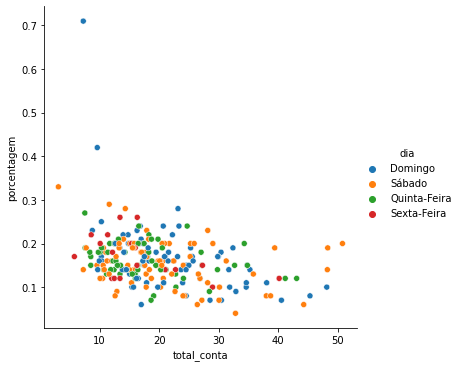

In [203]:
sns.relplot(x="total_conta", y="porcentagem", hue="dia", data=gorjetas)

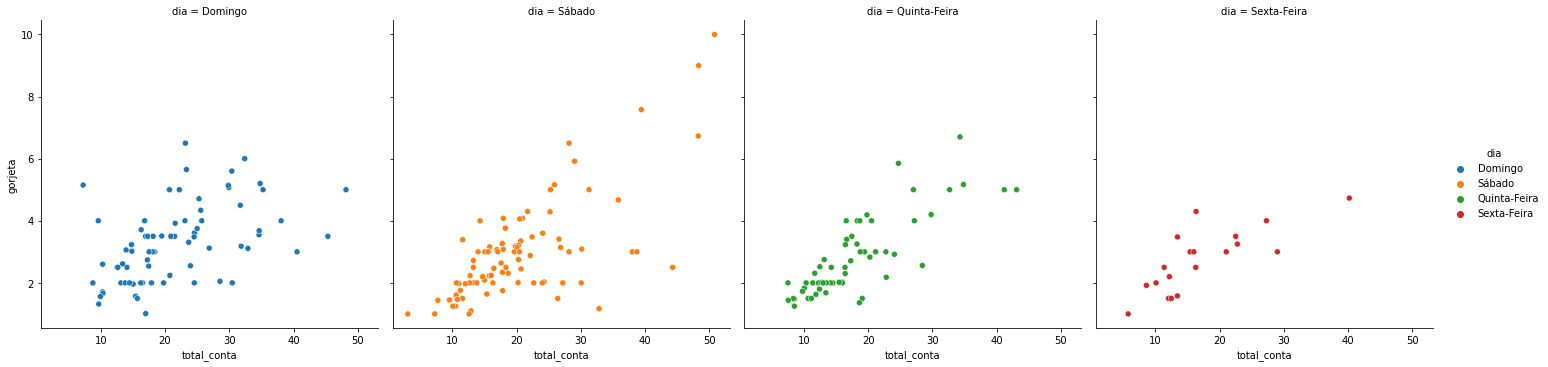

In [204]:
sns.relplot(x="total_conta", y="gorjeta", hue="dia", col="dia", data=gorjetas)

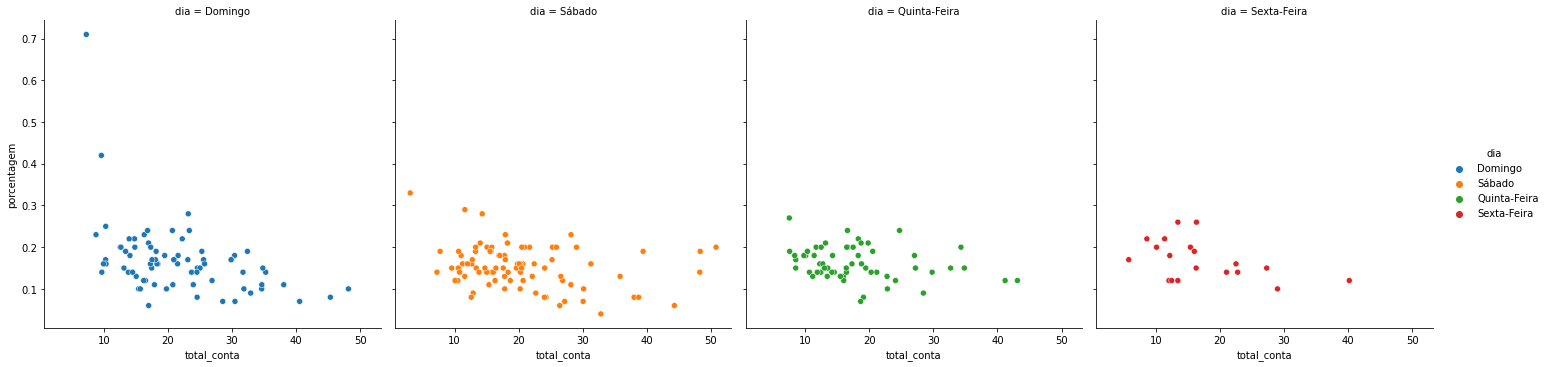

In [205]:
sns.relplot(x="total_conta", y="porcentagem", hue="dia", col="dia", data=gorjetas)

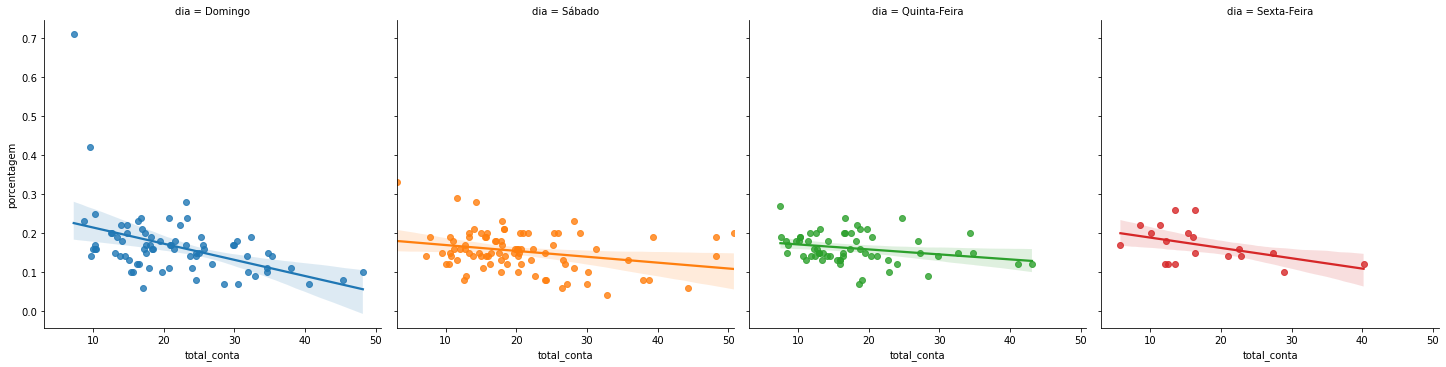

In [206]:
sns.lmplot(x="total_conta", y="porcentagem", hue="dia", col="dia", data=gorjetas)

In [207]:
media_gorjetas = gorjetas.gorjeta.mean()

In [208]:
print(f"A média das gorjetas é de {media_gorjetas:.3f}")

A média das gorjetas é de 2.998


In [209]:
gorjetas.groupby(["dia"]).mean()[["total_conta", "gorjeta", "porcentagem"]]

,total_conta,gorjeta,porcentagem
dia,,,
Domingo,21.410000,3.255132,0.166974
Quinta-Feira,17.682742,2.771452,0.161129
Sexta-Feira,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [210]:
print("Frequencia dos dias:")
gorjetas.dia.value_counts()

Frequencia dos dias:


Sábado          87
Domingo         76
Quinta-Feira    62
Sexta-Feira     19
Name: dia, dtype: int64

### Teste de Hipótese

H<sup>null</sup>

> A distribuição do valor da conta é igual no sábado e domingo

H<sup>alt</sup>

> A distribuição do valor da conta não é igual no sábado e domingo

In [211]:
conta_domingo = gorjetas.query("dia == 'Domingo'").total_conta

In [212]:
conta_sabado = gorjetas.query("dia == 'Sábado'").total_conta

In [213]:
r2 = ranksums(conta_domingo, conta_sabado)
print(f"O valor do p-value é {r2.pvalue:.2f}")

O valor do p-value é 0.36


H<sup>null</sup>

> A distribuição do valor da conta é igual no sábado e domingo

# Aula 5 

## Distribuição de frequencia e teste de hipótese

In [214]:
gorjetas.hora.unique()

array(['Jantar', 'Almoço'], dtype=object)

### Análise 4 - hora do dia

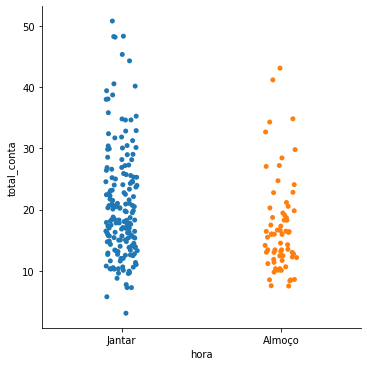

In [215]:
sns.catplot(x="hora", y="total_conta", data=gorjetas)

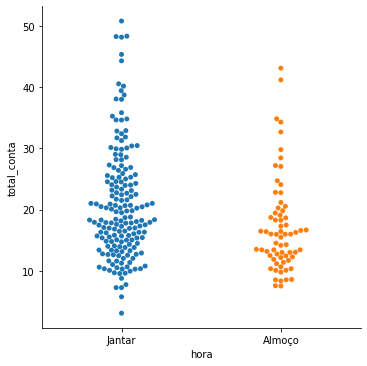

In [216]:
sns.catplot(x="hora", y="total_conta", kind="swarm", data=gorjetas)

<AxesSubplot:xlabel='hora', ylabel='total_conta'>

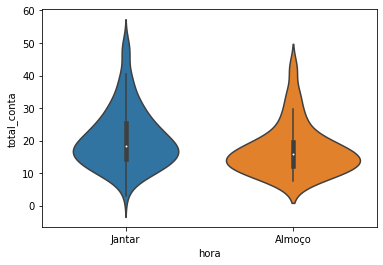

In [217]:
sns.violinplot(x="hora", y="total_conta", data=gorjetas)

<AxesSubplot:xlabel='hora', ylabel='total_conta'>

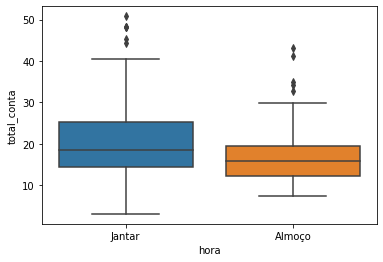

In [218]:
sns.boxplot(x="hora", y="total_conta", data=gorjetas)

In [219]:
almoco = gorjetas.query("hora == 'Almoço'").total_conta

C:\Users\hugor\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_conta', ylabel='Density'>

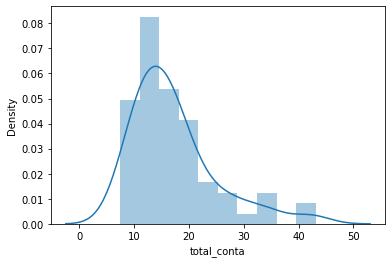

In [220]:
sns.distplot(almoco)

C:\Users\hugor\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_conta'>

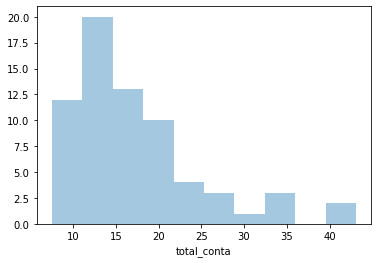

In [221]:
sns.distplot(almoco, kde=False)

In [222]:
jantar = gorjetas.query("hora == 'Jantar'").total_conta

<AxesSubplot:xlabel='total_conta', ylabel='Density'>

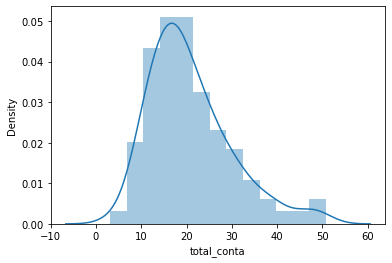

In [223]:
sns.distplot(jantar)

C:\Users\hugor\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_conta'>

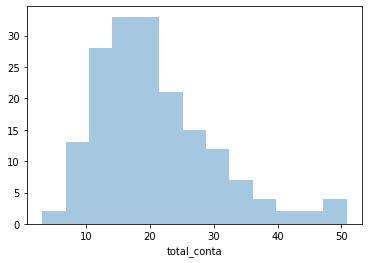

In [224]:
sns.distplot(jantar, kde=False)

In [225]:
gorjetas.groupby(["hora"]).mean()[["total_conta", "gorjeta", "porcentagem"]]

,total_conta,gorjeta,porcentagem
hora,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


### Teste de Hipótese

H<sup>null</sup>

> A distribuição do valor da conta é igual no jantar e no almoço

H<sup>alt</sup>

> A distribuição do valor da conta não é igual no jantar e no almoço

In [226]:
r3 = ranksums(almoco, jantar)

In [227]:
print(f"O valor do p-value é {r3.pvalue:.3f}")

O valor do p-value é 0.001


H<sup>alt</sup>

> A distribuição do valor da conta não é igual no jantar e no almoço

In [228]:
porcentagem_almoco = gorjetas.query("hora == 'Almoço'").porcentagem

In [229]:
porcentagem_jantar = gorjetas.query("hora == 'Jantar'").porcentagem

In [230]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [231]:
print(f"O valor do p-value é {r4.pvalue:.2f}")

O valor do p-value é 0.26


H<sup>null</sup>

> A distribuição da taxa de gorjeta é igual no jantar e no almoço